In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import autoviz
import plotly.express as px


In [ ]:

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

In [ ]:
column_headers = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, names=column_headers)



In [ ]:
#remove fnlwgt values

data.drop("fnlwgt", axis=1, inplace=True)


In [ ]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.head(20)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:

age_distribution = data['age'].value_counts().reset_index()
age_distribution.columns = ['Age', 'Count']

fig = px.bar(age_distribution, x='Age', y='Count', title='Age Distribution')
fig.show()

In [ ]:
age_distribution = data['education-num'].value_counts().reset_index()
age_distribution.columns = ['Education-Num', 'Count']

fig = px.bar(age_distribution, x='Education-Num', y='Count', title='Education-Num')
fig.show()

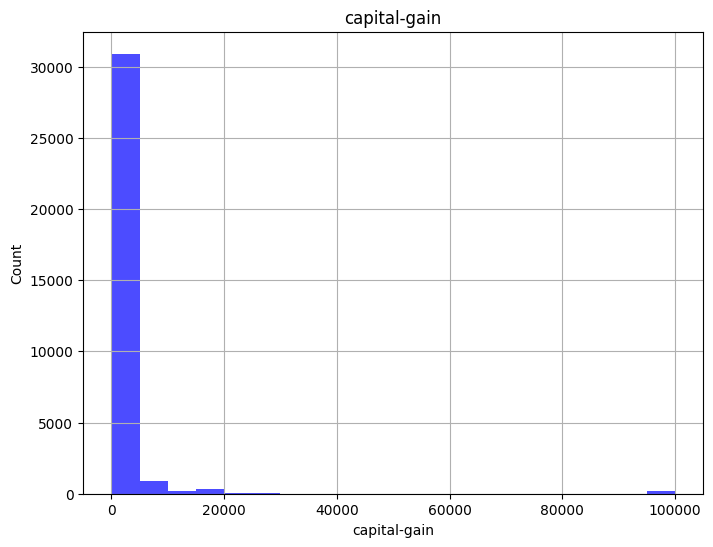

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['capital-gain'], bins=20, color='blue', alpha=0.7)
plt.title(f'capital-gain')
plt.xlabel('capital-gain')
plt.ylabel('Count')
plt.grid(True)

plt.show()




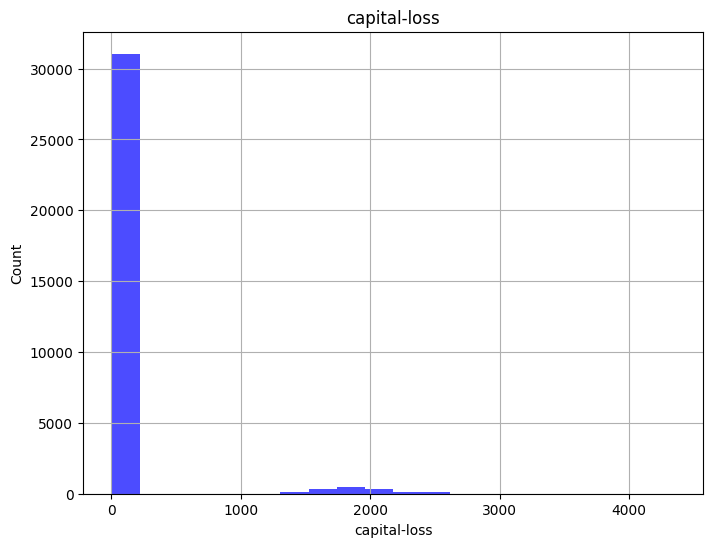

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['capital-loss'], bins=20, color='blue', alpha=0.7)
plt.title(f'capital-loss')
plt.xlabel('capital-loss')
plt.ylabel('Count')
plt.grid(True)

plt.show()


In [ ]:

age_distribution = data['hours-per-week'].value_counts().reset_index()
age_distribution.columns = ['DS_hours-per-week', 'Count']

fig = px.bar(age_distribution, x='DS_hours-per-week', y='Count', title='Hours-per-week')
fig.show()

In [ ]:
chart = categorical_histogram(data, *['marital-status'], **{})
chart

In [ ]:
chart = categorical_histogram(data, *['workclass'], **{})
chart

In [ ]:
chart = categorical_histogram(data, *['occupation'], **{})
chart

In [ ]:
chart = categorical_histogram(data, *['relationship'], **{})
chart

In [ ]:

chart = categorical_histogram(data, *['race'], **{})
chart

In [ ]:

chart = categorical_histogram(data, *['sex'], **{})
chart

In [ ]:

age_distribution = data['native-country'].value_counts().reset_index()
age_distribution.columns = ['native-country', 'Count']

fig = px.bar(age_distribution, x='native-country', y='Count', title='Hours-per-week')
fig.show()

In [ ]:
income_distribution = data['salary'].value_counts().reset_index()
income_distribution.columns = ['Income', 'Count']

fig = px.pie(income_distribution, names='Income', values='Count', title='Income Distribution')
fig.show()

In [ ]:

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding for categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[non_numeric_columns]).toarray()

# Combine numerical and encoded categorical data
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
numerical_data = data[numerical_columns].values
final_data = np.hstack((numerical_data, encoded_data))








In [ ]:
# Parameters for coreset construction
coreset_size = len(final_data)
kmeans_clusters = 3256;
print("Coreset Size = "+str(coreset_size))
print("kmeans_clusters =  " + str(kmeans_clusters))

# Construct the coreset using k-Means clustering
kmeans = KMeans(n_clusters=kmeans_clusters, random_state=42)
kmeans.fit(final_data)

# Get the cluster centers as the coreset points
coreset_points = kmeans.cluster_centers_




Coreset Size = 32561
kmeans_clusters =  3256


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
## Select a subset of principal records for downsampling
principal_indices = kmeans.predict(final_data)

# Ensure coreset_size doesn't exceed the number of principal records //Fixed
if coreset_size > len(np.unique(principal_indices)):
    coreset_size = len(np.unique(principal_indices))

downsampled_indices = np.random.choice(np.unique(principal_indices), size=coreset_size, replace=False)

# Create the downsampled dataset using the selected indices
downsampled_data = final_data[downsampled_indices]



In [ ]:
# Convert coreset points back to the original categorical values
decoded_categorical_data = encoder.inverse_transform(downsampled_data[:, len(numerical_columns):])

# Combine numerical and decoded categorical data for the final result
final_result = np.hstack((downsampled_data[:, :len(numerical_columns)], decoded_categorical_data))

print("Final result:")
print(final_result)

Final result:
[[39.0 9.0 3103.0 ... ' Male' ' United-States' ' >50K']
 [40.0 14.0 0.0 ... ' Male' ' United-States' ' <=50K']
 [27.0 13.0 0.0 ... ' Male' ' United-States' ' <=50K']
 ...
 [21.0 10.0 0.0 ... ' Female' ' United-States' ' <=50K']
 [22.0 13.0 0.0 ... ' Male' ' Taiwan' ' <=50K']
 [60.0 9.0 0.0 ... ' Male' ' United-States' ' <=50K']]


In [ ]:
#converting to a dataframe
column_headers = ['DS_age', 'DS_education-num', 'DS_capital-gain', 'DS_capital-loss', 'DS_hours-per-week','DS_workclass', 'DS_education', 'DS_marital-status', 'DS_occupation', 'DS_relationship', 'DS_race','DS_sex','DS_native-country','DS_salary']
df = pd.DataFrame(final_result, columns= column_headers)
df.head(100)


,DS_age,DS_education-num,DS_capital-gain,DS_capital-loss,DS_hours-per-week,DS_workclass,DS_education,DS_marital-status,DS_occupation,DS_relationship,DS_race,DS_sex,DS_native-country,DS_salary
0,39.0,9.0,3103.0,0.0,44.0,Private,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K
1,40.0,14.0,0.0,0.0,40.0,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
2,27.0,13.0,0.0,0.0,48.0,Federal-gov,Bachelors,Never-married,Exec-managerial,Not-in-family,Black,Male,United-States,<=50K
3,50.0,9.0,3103.0,0.0,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
4,24.0,9.0,0.0,0.0,40.0,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,46.0,12.0,0.0,0.0,33.0,Private,Assoc-acdm,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
96,45.0,7.0,0.0,0.0,20.0,Private,11th,Widowed,Other-service,Not-in-family,Black,Female,United-States,<=50K
97,19.0,10.0,0.0,0.0,50.0,Private,Some-college,Never-married,Machine-op-inspct,Other-relative,White,Male,United-States,<=50K
98,45.0,9.0,0.0,0.0,55.0,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [ ]:
#change collums to match original one

print("Data Types Before Conversion:")
print(df.dtypes)

# Specify the new data types for specific columns
new_data_types = {'DS_age': 'int64', 'DS_education-num': 'int64', 'DS_capital-gain': 'int64', 'DS_capital-loss': 'int64', 'DS_hours-per-week': 'int64' }

# Use .astype() to change the data types
df = df.astype(new_data_types)

# age                int64
# workclass         object
# education         object
# education-num      int64
# marital-status    object
# occupation        object
# relationship      object
# race              object
# sex               object
# capital-gain       int64
# capital-loss       int64
# hours-per-week     int64
# native-country    object
# salary            object

# Display the data types after conversion
print("\nData Types After Conversion:")
print(df.dtypes)

Data Types Before Conversion:
DS_age               object
DS_education-num     object
DS_capital-gain      object
DS_capital-loss      object
DS_hours-per-week    object
DS_workclass         object
DS_education         object
DS_marital-status    object
DS_occupation        object
DS_relationship      object
DS_race              object
DS_sex               object
DS_native-country    object
DS_salary            object
dtype: object

Data Types After Conversion:
DS_age                int64
DS_education-num      int64
DS_capital-gain       int64
DS_capital-loss       int64
DS_hours-per-week     int64
DS_workclass         object
DS_education         object
DS_marital-status    object
DS_occupation        object
DS_relationship      object
DS_race              object
DS_sex               object
DS_native-country    object
DS_salary            object
dtype: object


In [ ]:

# Create a bar chart for age distribution
age_distribution = df['DS_age'].value_counts().reset_index()
age_distribution.columns = ['Age', 'Count']

fig = px.bar(age_distribution, x='Age', y='Count', title='Age Distribution Downsampled')
fig.show()

In [ ]:
age_distribution = df['DS_education-num'].value_counts().reset_index()
age_distribution.columns = ['Education-Num', 'Count']

fig = px.bar(age_distribution, x='Education-Num', y='Count', title='Education-Num Downsampled')
fig.show()

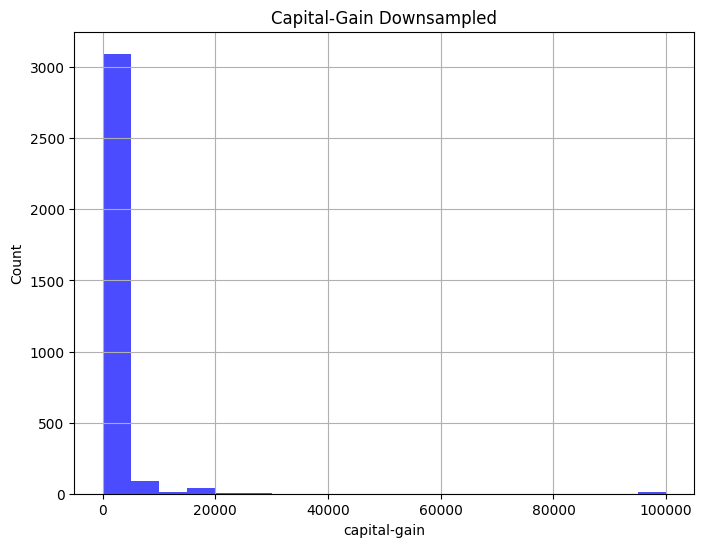

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['DS_capital-gain'], bins=20, color='blue', alpha=0.7)
plt.title(f'Capital-Gain Downsampled')
plt.xlabel('capital-gain')
plt.ylabel('Count')
plt.grid(True)

plt.show()


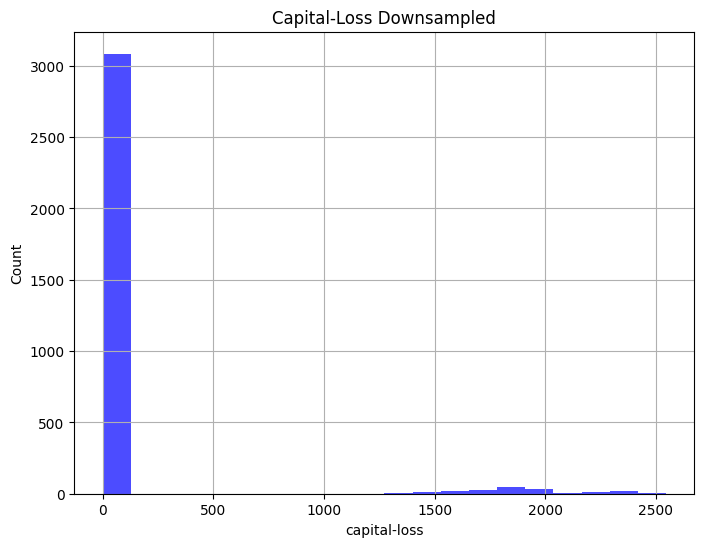

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['DS_capital-loss'], bins=20, color='blue', alpha=0.7)
plt.title(f'Capital-Loss Downsampled')
plt.xlabel('capital-loss')
plt.ylabel('Count')
plt.grid(True)

plt.show()

In [ ]:
age_distribution = df['DS_hours-per-week'].value_counts().reset_index()
age_distribution.columns = ['DS_hours-per-week', 'Count']

fig = px.bar(age_distribution, x='DS_hours-per-week', y='Count', title='Hours-per-week Downsampled')
fig.show()

In [ ]:
chart = categorical_histogram(df, *['DS_marital-status'], **{})
chart

In [ ]:
chart = categorical_histogram(df, *['DS_workclass'], **{})
chart

In [ ]:
chart = categorical_histogram(df, *['DS_occupation'], **{})
chart

In [ ]:
chart = categorical_histogram(df, *['DS_relationship'], **{})
chart

In [ ]:

chart = categorical_histogram(df, *['DS_race'], **{})
chart

In [ ]:

chart = categorical_histogram(df, *['DS_sex'], **{})
chart

In [ ]:

age_distribution = df['DS_native-country'].value_counts().reset_index()
age_distribution.columns = ['native-country', 'Count']

fig = px.bar(age_distribution, x='native-country', y='Count', title='native-country')
fig.show()

In [ ]:
income_distribution = df['DS_salary'].value_counts().reset_index()
income_distribution.columns = ['Income', 'Count']

fig = px.pie(income_distribution, names='Income', values='Count', title='Income Distribution')
fig.show()

In [ ]:
output_file_path = "output.txt"
with open(output_file_path, "w") as f:
    for row in final_result:
        f.write(" ".join(map(str, row)) + "\n")

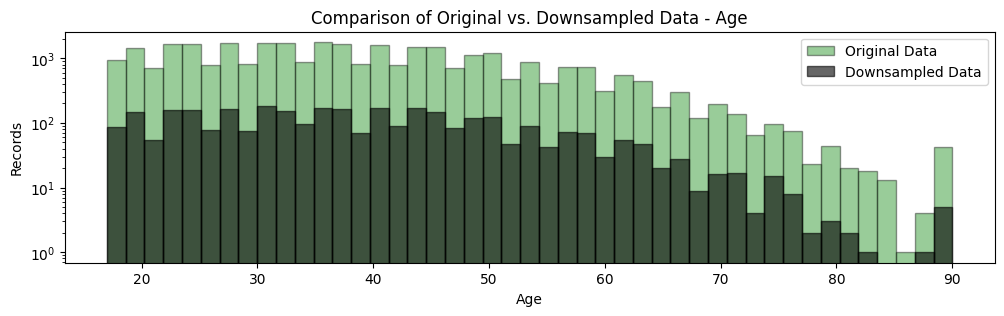

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 3))

ax.hist(data['age'], alpha=0.4,bins=45, label='Original Data', color='green', edgecolor='black',log=True)
ax.hist(df['DS_age'], alpha=0.6,bins=45, label='Downsampled Data', color='black', edgecolor='black',log=True)

ax.set_xlabel('Age')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Age')
ax.legend()

plt.show()

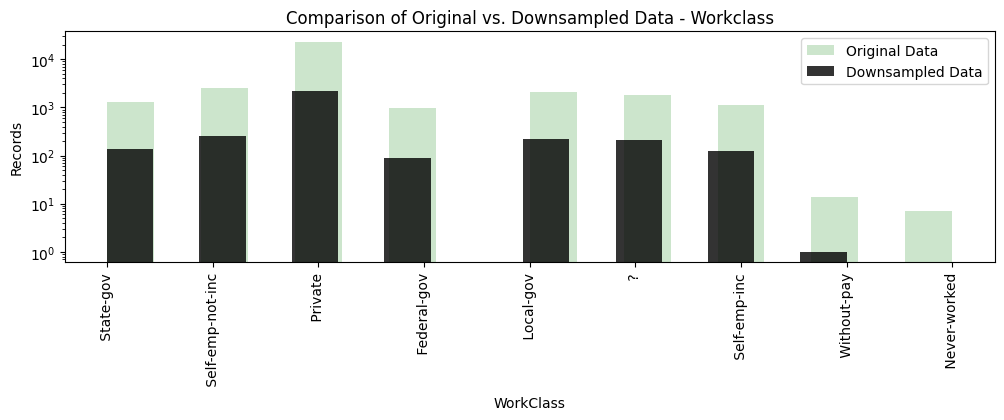

In [ ]:

fig, ax = plt.subplots(figsize=(12, 3))

plt.xticks(rotation='vertical')

ax.hist(data['workclass'], bins=18, alpha=0.2, label='Original Data', color='green',log=True,stacked = True)
ax.hist(df['DS_workclass'], bins=16, alpha=0.8, label='Downsampled Data', color='black',log=True,stacked = True)

ax.set_xlabel('WorkClass')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Workclass')
ax.legend()

plt.show()

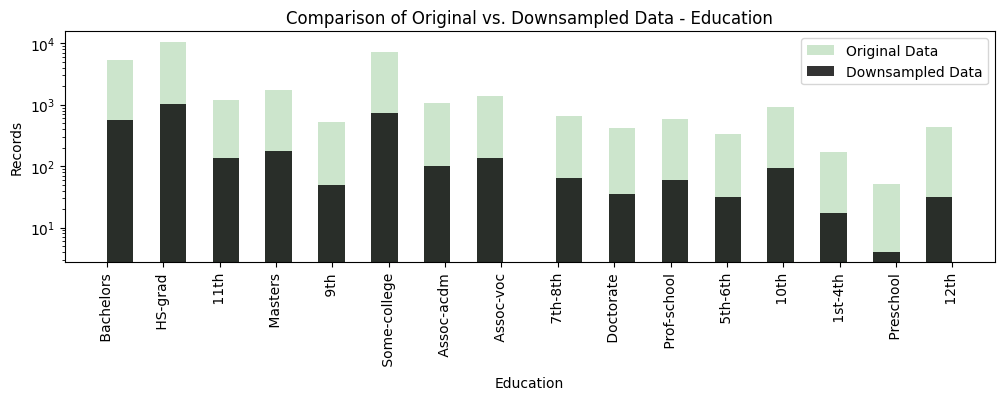

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
plt.xticks(rotation='vertical')


ax.hist(data['education'], bins=32, alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_education'], bins=32, alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Education')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Education')
ax.legend()

plt.show()

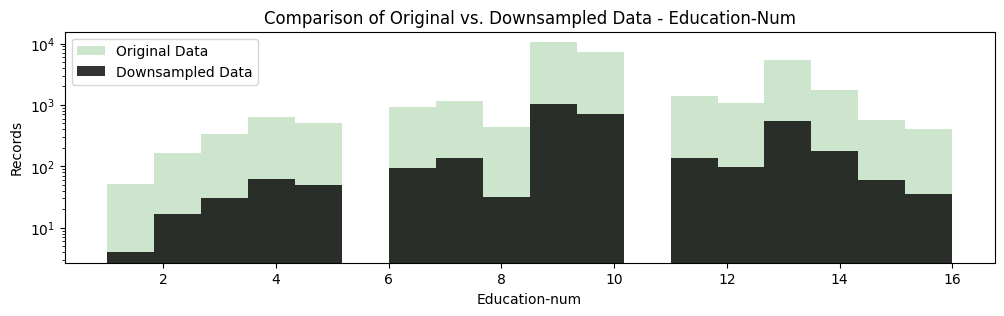

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))


ax.hist(data['education-num'], bins=18, alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_education-num'], bins=18, alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Education-num')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Education-Num')
ax.legend()

plt.show()

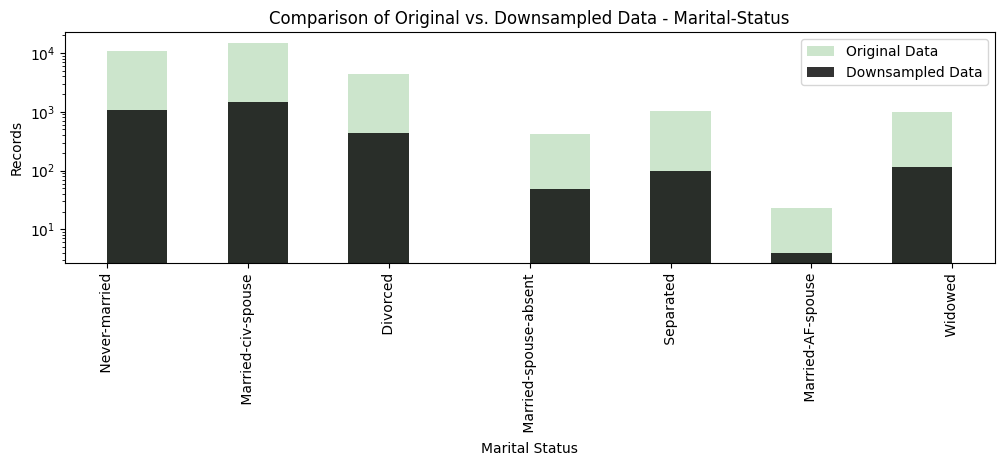

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.xticks(rotation=90)


ax.hist(data['marital-status'], bins=14,align='mid', alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_marital-status'], bins=14,align='mid', alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Marital Status')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Marital-Status')
ax.legend()



plt.show()



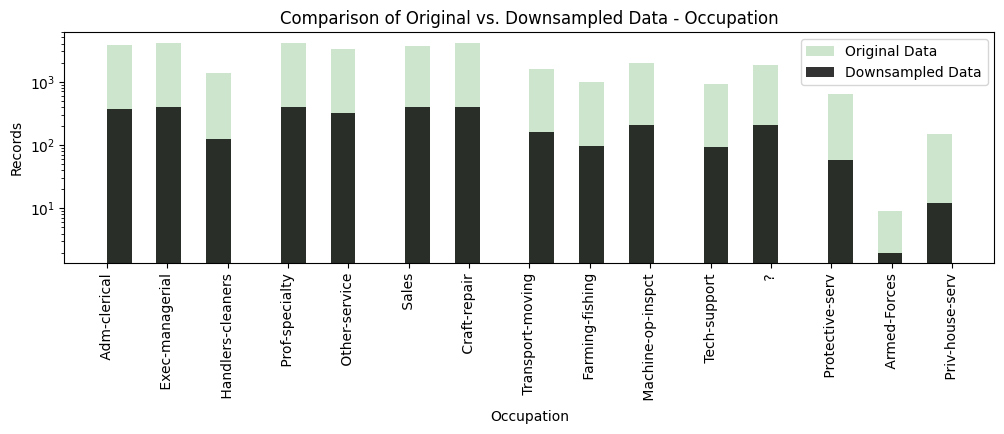

In [ ]:

fig, ax = plt.subplots(figsize=(12, 3))
plt.xticks(rotation=90)


ax.hist(data['occupation'], bins=34,align='mid', alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_occupation'], bins=34,align='mid', alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Occupation')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Occupation')
ax.legend()



plt.show()


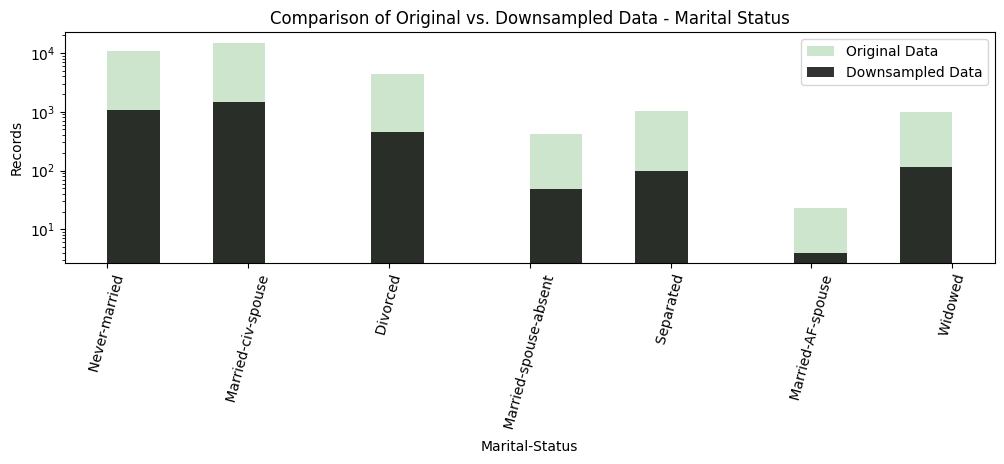

In [ ]:

fig, ax = plt.subplots(figsize=(12, 3))
plt.xticks(rotation=75)


ax.hist(data['marital-status'], bins=16,align='mid', alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_marital-status'], bins=16,align='mid', alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Marital-Status')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Marital Status')
ax.legend()


plt.show()


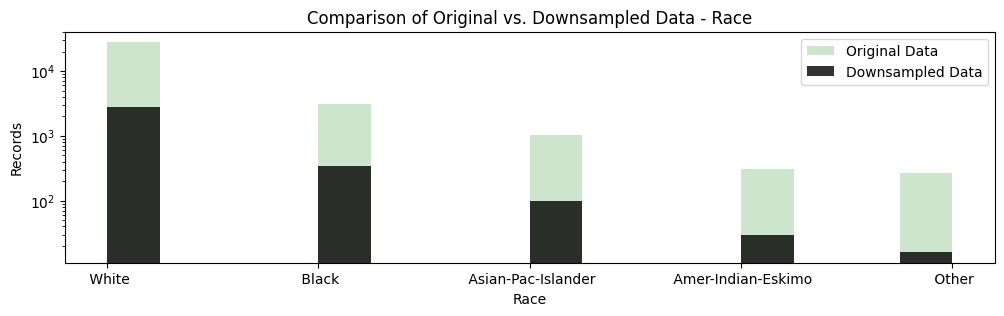

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.xticks(rotation=0)


ax.hist(data['race'], bins=16,align='mid', alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_race'], bins=16,align='mid', alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Race')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Race')
ax.legend()



plt.show()

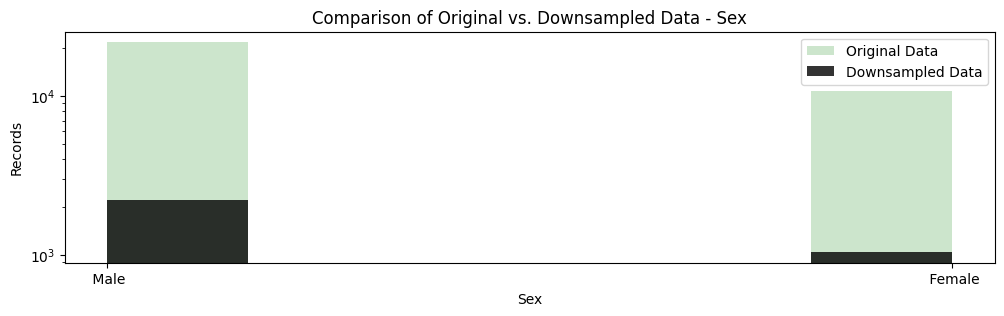

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.xticks(rotation=0)


ax.hist(data['sex'], bins=6,align='mid', alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_sex'], bins=6,align='mid', alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Sex')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Sex')
ax.legend()



# Display the plot
plt.show()

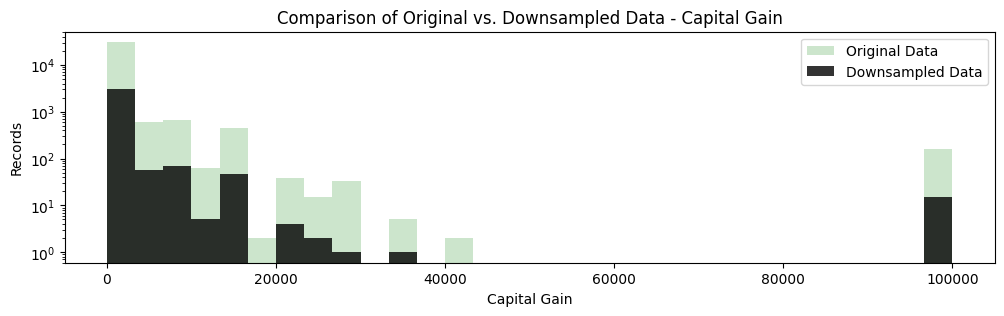

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.xticks(rotation=0)


ax.hist(data['capital-gain'], bins=30,align='mid', alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_capital-gain'], bins=30,align='mid', alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Capital Gain')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Capital Gain')
ax.legend()



plt.show()

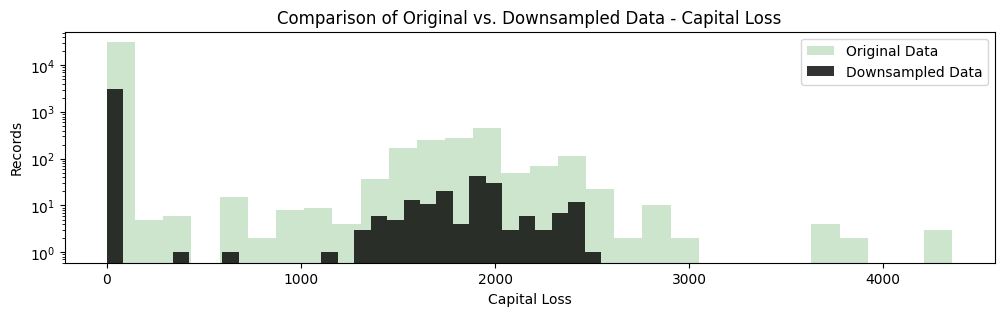

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.xticks(rotation=0)


ax.hist(data['capital-loss'], bins=30,align='mid', alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_capital-loss'], bins=30,align='mid', alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Capital Loss')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Capital Loss')
ax.legend()



plt.show()




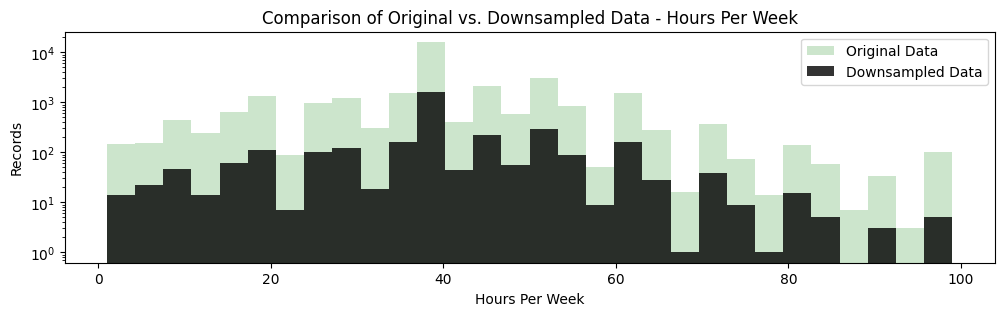

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.xticks(rotation=0)


ax.hist(data['hours-per-week'], bins=30,align='mid', alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_hours-per-week'], bins=30,align='mid', alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Hours Per Week')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Hours Per Week')
ax.legend()



plt.show()

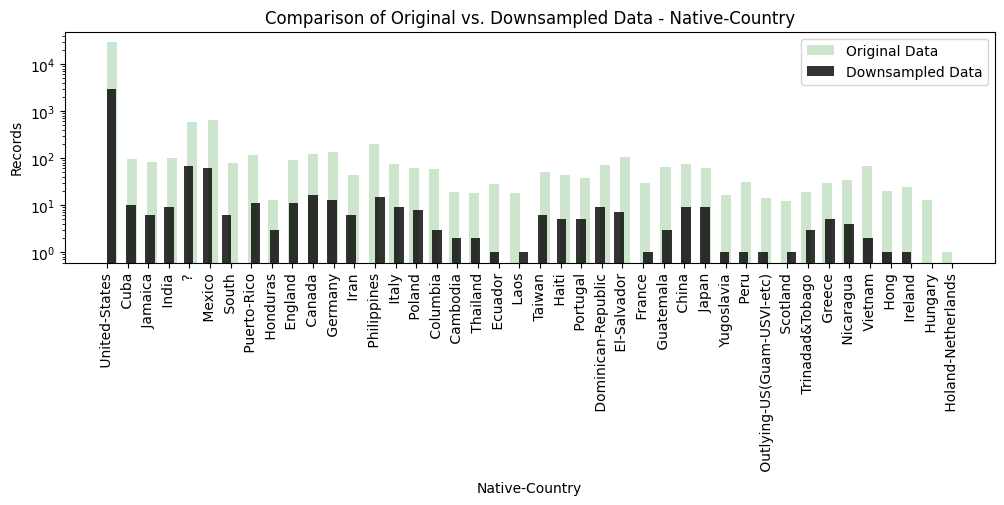

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.xticks(rotation=90)


ax.hist(data['native-country'], bins=84,align='mid', alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_native-country'], bins=84,align='mid', alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Native-Country')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Native-Country')
ax.legend()



plt.show()

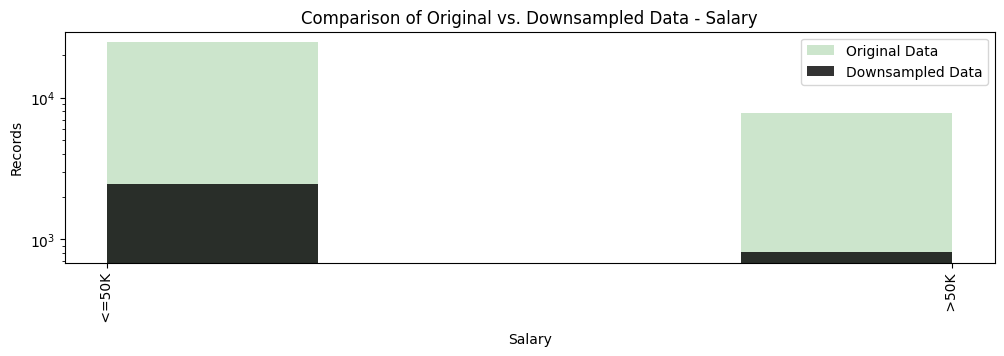

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.xticks(rotation=90)


ax.hist(data['salary'], bins=4,align='mid', alpha=0.2, label='Original Data', color='green',log=True)
ax.hist(df['DS_salary'], bins=4,align='mid', alpha=0.8, label='Downsampled Data', color='black',log=True)

ax.set_xlabel('Salary')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Salary')
ax.legend()



plt.show()

In [ ]:
correlation_original = data.corr()
correlation_downsampled = df.corr()

print("Correlation - Original:")
print(correlation_original)

print("\nCorrelation - Downsampled:")
print(correlation_downsampled)

Correlação no Original:
                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.036527      0.077674      0.057775   
education-num   0.036527       1.000000      0.122630      0.079923   
capital-gain    0.077674       0.122630      1.000000     -0.031615   
capital-loss    0.057775       0.079923     -0.031615      1.000000   
hours-per-week  0.068756       0.148123      0.078409      0.054256   

                hours-per-week  
age                   0.068756  
education-num         0.148123  
capital-gain          0.078409  
capital-loss          0.054256  
hours-per-week        1.000000  

Correlação no Downsampled:
                     DS_age  DS_education-num  DS_capital-gain  \
DS_age             1.000000          0.015679         0.071855   
DS_education-num   0.015679          1.000000         0.112833   
DS_capital-gain    0.071855          0.112833         1.000000   
DS_capital-loss    0.057695          0.078659        -0.033

<ipython-input-54-e3a87d603f3c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-54-e3a87d603f3c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
from scipy.stats import entropy

# Calculate entropy
age_original_entropy = entropy(np.bincount(data['age']))
age_downsampled_entropy = entropy(np.bincount(df['DS_age']))

print("Original Data Entropy:", age_original_entropy)
print("Downsampled Data Entropy:", age_downsampled_entropy)

Original Data Entropy: 3.9393802815724417
Downsampled Data Entropy: 3.9325717734635557


<ipython-input-56-d220e1b8418e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-56-d220e1b8418e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



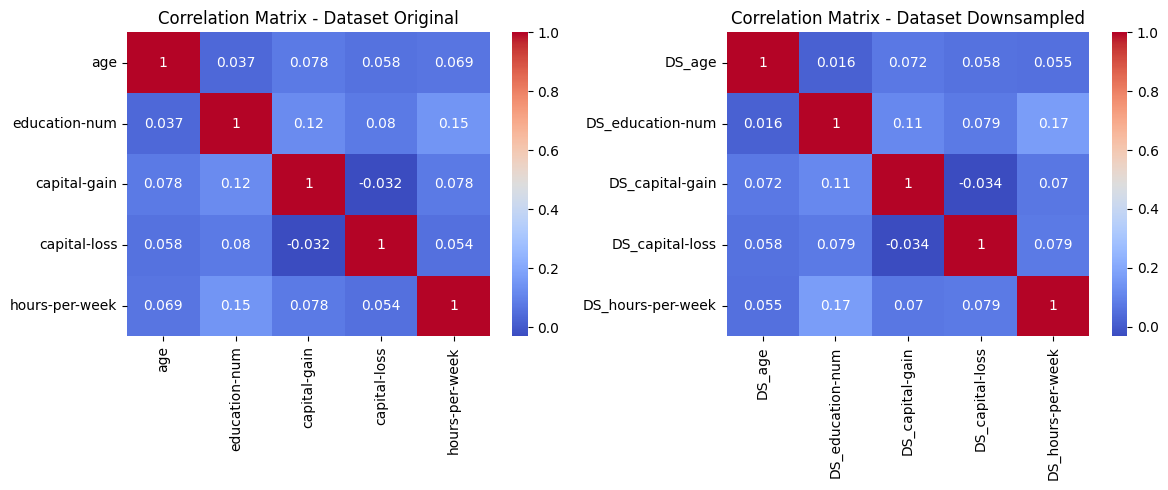

In [ ]:
correlation_matrix1 = data.corr()
correlation_matrix2 = df.corr()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix - Dataset Original')

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix - Dataset Downsampled')

plt.tight_layout()
plt.show()

In [ ]:
count_unique_original = data.nunique()
count_unique_Downsample = df.nunique()


Show_unique_original = data.apply(lambda x: x.unique())
Show_unique_Downsampled = df.apply(lambda x: x.unique())


print("Count by table original:")
print(count_unique_Original)

print("Count by table Downsampled:")
print(count_unique_Downsample)

print("\n Show unique values: Original")
print(Show_unique_original)

print("\n Show unique values: Downsampled:")
print(Show_unique_Downsampled)

Contagem de Valores Únicos por Coluna no dataset original:
age                73
workclass           9
education          16
education-num      16
marital-status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     42
salary              2
dtype: int64
Contagem de Valores Únicos por Coluna no dataset Downsampled:
DS_age               68
DS_education-num     16
DS_capital-gain      67
DS_capital-loss      48
DS_hours-per-week    71
DS_workclass          8
DS_education         16
DS_marital-status     7
DS_occupation        15
DS_relationship       6
DS_race               5
DS_sex                2
DS_native-country    40
DS_salary             2
dtype: int64

Valores Únicos por Coluna no dataset Original:
age               [39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 2...
workclass         [ State-gov,  Self-emp-not-inc,  Private,  Fed...
education         [ Bache

In [ ]:
count1 = data['workclass'].value_counts()
count2 = df['DS_workclass'].value_counts()

CountRecords1 = count1.index
Values1 = count1.values

CountRecords2 = count2.index
Values2 = contagem_coluna2.values

print("Count records per value  on original")
for value, quantity in zip(CountRecords1, Values1):
    print(f"{value}: {quantity}")

print("\nCount records per value on Downsampled:")
for value, quantity in zip(CountRecords2, Values2):
    print(f"{value}: {quantity}")

Valores e suas contagens na Coluna 1:
 Private: 22696
 Self-emp-not-inc: 2541
 Local-gov: 2093
 ?: 1836
 State-gov: 1298
 Self-emp-inc: 1116
 Federal-gov: 960
 Without-pay: 14
 Never-worked: 7

Valores e suas contagens na Coluna 2:
 Private: 2224
 Self-emp-not-inc: 257
 Local-gov: 218
 ?: 208
 State-gov: 135
 Self-emp-inc: 124
 Federal-gov: 89
 Without-pay: 1


In [ ]:
count1 = data['education'].value_counts()
count2 = df['DS_education'].value_counts()

CountRecords1 = count1.index
Values1 = count1.values

CountRecords2 = count2.index
Values2 = contagem_coluna2.values

print("Count records per value  on original")
for value, quantity in zip(CountRecords1, Values1):
    print(f"{value}: {quantity}")

print("\nCount records per value on Downsampled:")
for value, quantity in zip(CountRecords2, Values2):
    print(f"{value}: {quantity}")

Valores e suas contagens na Coluna 1:
 HS-grad: 10501
 Some-college: 7291
 Bachelors: 5355
 Masters: 1723
 Assoc-voc: 1382
 11th: 1175
 Assoc-acdm: 1067
 10th: 933
 7th-8th: 646
 Prof-school: 576
 9th: 514
 12th: 433
 Doctorate: 413
 5th-6th: 333
 1st-4th: 168
 Preschool: 51

Valores e suas contagens na Coluna 2:
 HS-grad: 1045
 Some-college: 720
 Bachelors: 555
 Masters: 179
 Assoc-voc: 137
 11th: 137
 Assoc-acdm: 99
 10th: 93
 7th-8th: 63
 Prof-school: 60
 9th: 49
 Doctorate: 35
 12th: 32
 5th-6th: 31
 1st-4th: 17
 Preschool: 4


In [ ]:
count1 = data['sex'].value_counts()
count2 = df['DS_sex'].value_counts()

CountRecords1 = count1.index
Values1 = count1.values

CountRecords2 = count2.index
Values2 = contagem_coluna2.values

print("Count records per value  on original")
for value, quantity in zip(CountRecords1, Values1):
    print(f"{value}: {quantity}")

print("\nCount records per value on Downsampled:")
for value, quantity in zip(CountRecords2, Values2):
    print(f"{value}: {quantity}")

Valores e suas contagens na Coluna 1:
 Male: 21790
 Female: 10771

Valores e suas contagens na Coluna 2:
 Male: 2216
 Female: 1040


In [ ]:
count1 = data['race'].value_counts()
count2 = df['DS_race'].value_counts()

CountRecords1 = count1.index
Values1 = count1.values

CountRecords2 = count2.index
Values2 = contagem_coluna2.values

print("Count records per value  on original")
for value, quantity in zip(CountRecords1, Values1):
    print(f"{value}: {quantity}")

print("\nCount records per value on Downsampled:")
for value, quantity in zip(CountRecords2, Values2):
    print(f"{value}: {quantity}")

Valores e suas contagens na Coluna 1:
 White: 27816
 Black: 3124
 Asian-Pac-Islander: 1039
 Amer-Indian-Eskimo: 311
 Other: 271

Valores e suas contagens na Coluna 2:
 White: 2772
 Black: 339
 Asian-Pac-Islander: 100
 Amer-Indian-Eskimo: 29
 Other: 16


In [ ]:
count1 = data['occupation'].value_counts()
count2 = df['DS_occupation'].value_counts()

CountRecords1 = count1.index
Values1 = count1.values

CountRecords2 = count2.index
Values2 = contagem_coluna2.values

print("Count records per value  on original")
for value, quantity in zip(CountRecords1, Values1):
    print(f"{value}: {quantity}")

print("\nCount records per value on Downsampled:")
for value, quantity in zip(CountRecords2, Values2):
    print(f"{value}: {quantity}")

Valores e suas contagens na Coluna 1:
 Prof-specialty: 4140
 Craft-repair: 4099
 Exec-managerial: 4066
 Adm-clerical: 3770
 Sales: 3650
 Other-service: 3295
 Machine-op-inspct: 2002
 ?: 1843
 Transport-moving: 1597
 Handlers-cleaners: 1370
 Farming-fishing: 994
 Tech-support: 928
 Protective-serv: 649
 Priv-house-serv: 149
 Armed-Forces: 9

Valores e suas contagens na Coluna 2:
 Exec-managerial: 404
 Sales: 402
 Prof-specialty: 399
 Craft-repair: 396
 Adm-clerical: 369
 Other-service: 325
 Machine-op-inspct: 208
 ?: 208
 Transport-moving: 158
 Handlers-cleaners: 125
 Farming-fishing: 95
 Tech-support: 94
 Protective-serv: 59
 Priv-house-serv: 12
 Armed-Forces: 2


In [ ]:
count1 = data['salary'].value_counts()
count2 = df['DS_salary'].value_counts()

CountRecords1 = count1.index
Values1 = count1.values

CountRecords2 = count2.index
Values2 = contagem_coluna2.values

print("Count records per value  on original")
for value, quantity in zip(CountRecords1, Values1):
    print(f"{value}: {quantity}")

print("\nCount records per value on Downsampled:")
for value, quantity in zip(CountRecords2, Values2):
    print(f"{value}: {quantity}")

Valores e suas contagens na Coluna 1:
 <=50K: 24720
 >50K: 7841

Valores e suas contagens na Coluna 2:
 <=50K: 2447
 >50K: 809
